In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot') 

# EDA

In [ ]:
# Import and see the top 5 row in the dataset
df = pd.read_csv("Breast_cancer_data.csv")
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
#how many number of columns and  row
df.shape

(569, 6)

In [ ]:
#All columns name
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [ ]:
#Check for missing value
df.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [ ]:
#Check the location if there is  any duplicated value
df.loc[df.duplicated()].count()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [ ]:
#check Data types
df.dtypes 

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

In [ ]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


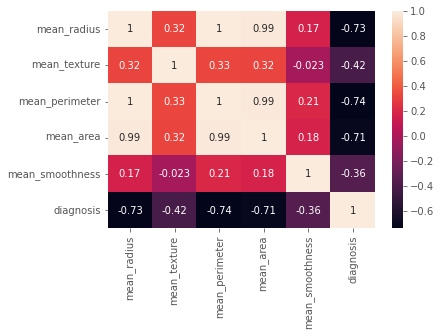

In [ ]:
# see the corelltion between columns 
df_corr = df[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis']].corr()
sns.heatmap(df_corr, annot=True)

# Build and check performances for ML Models


---

1. Artificial Neural Network
2. Deep Neural Network
3. Naiive Bayes
4. Decision Trees.

Import all dependency 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Split the data into features and labels
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

NameError: ignored

**ANN**

In [ ]:
# Define the neural network architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
15/15 [==============================] - 1s 2ms/step - loss: 25.5276 - accuracy: 0.5495
Epoch 2/10
15/15 [==============================] - 0s 2ms/step - loss: 6.3272 - accuracy: 0.4835
Epoch 3/10
15/15 [==============================] - 0s 2ms/step - loss: 1.8613 - accuracy: 0.5253
Epoch 4/10
15/15 [==============================] - 0s 3ms/step - loss: 0.7112 - accuracy: 0.6967
Epoch 5/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5019 - accuracy: 0.7956
Epoch 6/10
15/15 [==============================] - 0s 2ms/step - loss: 0.6688 - accuracy: 0.7451
Epoch 7/10
15/15 [==============================] - 0s 2ms/step - loss: 0.4697 - accuracy: 0.8110
Epoch 8/10
15/15 [==============================] - 0s 2ms/step - loss: 0.4355 - accuracy: 0.8088
Epoch 9/10
15/15 [==============================] - 0s 2ms/step - loss: 0.4217 - accuracy: 0.8264
Epoch 10/10
15/15 [==============================] - 0s 2ms/step - loss: 0.4553 - accuracy: 0.8044


In [ ]:
# Evaluation of Neural Network
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy of Neural Network:', test_acc)

4/4 [==============================] - 0s 3ms/step - loss: 0.4854 - accuracy: 0.7895
Test accuracy of Neural Network: 0.7894737124443054


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)

# Compute precision, recall, F1-score
from sklearn.metrics import accuracy_score, f1_score
confusion_matrix_ann = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Neural Network (ANN):")
print(confusion_matrix_ann)
print("\n Accuracy: ", accuracy_score(y_test, y_pred))
print("F1-Score: ", f1_score(y_test, y_pred))
print("\n Precision: ", precision_score(y_test, y_pred))
print("Sensitivity (Recall): ", recall_score(y_test, y_pred))
print("\n")

4/4 [==============================] - 0s 3ms/step
Confusion Matrix for Neural Network (ANN):
[[42  0]
 [72  0]]

 Accuracy:  0.3684210526315789
F1-Score:  0.0


NameError: ignored

DNN

In [ ]:

# Define the DNN model architecture
dnn_model = Sequential()
dnn_model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
dnn_model.add(Dense(64, activation='relu'))
dnn_model.add(Dense(32, activation='relu'))
dnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
dnn_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions on the test set
y_pred_prob = dnn_model.predict(X_test)
y_pred = np.round(y_pred_prob).astype(int)


Epoch 1/10
15/15 [==============================] - 1s 3ms/step - loss: 4.7645 - accuracy: 0.4813
Epoch 2/10
15/15 [==============================] - 0s 3ms/step - loss: 0.9848 - accuracy: 0.5473
Epoch 3/10
15/15 [==============================] - 0s 2ms/step - loss: 0.4817 - accuracy: 0.7692
Epoch 4/10
15/15 [==============================] - 0s 4ms/step - loss: 0.3955 - accuracy: 0.8154
Epoch 5/10
15/15 [==============================] - 0s 3ms/step - loss: 0.3573 - accuracy: 0.8527
Epoch 6/10
15/15 [==============================] - 0s 2ms/step - loss: 0.3382 - accuracy: 0.8615
Epoch 7/10
15/15 [==============================] - 0s 2ms/step - loss: 0.3285 - accuracy: 0.8593
Epoch 8/10
15/15 [==============================] - 0s 3ms/step - loss: 0.3482 - accuracy: 0.8527
Epoch 9/10
15/15 [==============================] - 0s 2ms/step - loss: 0.3399 - accuracy: 0.8637
Epoch 10/10
4/4 [==============================] - 0s 3ms/step


In [ ]:
# Evaluate the DNN
confusion_matrix_dnn = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for DNN:")
print(confusion_matrix_dnn)
print("\n Accuracy: ", accuracy_score(y_test, y_pred))
print("F1-Score: ", f1_score(y_test, y_pred))
print("\n Precision: ", precision_score(y_test, y_pred))
print("Sensitivity (Recall): ", recall_score(y_test, y_pred))

Confusion Matrix for DNN:
[[39  3]
 [21 51]]

 Accuracy:  0.7894736842105263
F1-Score:  0.8095238095238096


NameError: ignored

Naiive Bayes(NB)


In [ ]:
# Define the Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Evaluate the Naive Bayes classifier
confusion_matrix_nb = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Naive Bayes:")
print(confusion_matrix_nb)
print("\n Accuracy: ", accuracy_score(y_test, y_pred))
print("F1-Score: ", f1_score(y_test, y_pred))
print("\n Precision: ", precision_score(y_test, y_pred))
print("Sensitivity (Recall): ", recall_score(y_test, y_pred))

Confusion Matrix for Naive Bayes:
[[33  9]
 [ 3 69]]

 Accuracy:  0.8947368421052632
F1-Score:  0.9199999999999999


NameError: ignored

 Decision Trees.

In [ ]:
# Define the Decision Tree classifier
dt = DecisionTreeClassifier()

# Train the classifier
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Make predictions on the test set
y_pred = dt.predict(X_test)

# Evaluate the Decision Tree classifier
confusion_matrix_dt = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix_dt)
print("\n Accuracy: ", accuracy_score(y_test, y_pred))
print("F1-Score: ", f1_score(y_test, y_pred))
print("\n Precision: ", precision_score(y_test, y_pred))
print("Sensitivity (Recall): ", recall_score(y_test, y_pred))

Confusion Matrix for Decision Tree:
[[38  4]
 [11 61]]

 Accuracy:  0.868421052631579
F1-Score:  0.8905109489051095


NameError: ignored